In [1]:
%matplotlib inline

from vnpy.trader.app.ctaStrategy.ctaBacktesting import BacktestingEngine, OptimizationSetting, MINUTE_DB_NAME
from vnpy.trader.app.ctaStrategy.strategy.strategyBollChannel import BollChannelStrategy

In [2]:
# 创建回测引擎对象
engine = BacktestingEngine()

In [3]:
# 设置回测使用的数据
engine.setBacktestingMode(engine.BAR_MODE)    # 设置引擎的回测模式为K线
engine.setDatabase(MINUTE_DB_NAME, 'rb0000')  # 设置使用的历史数据库
engine.setStartDate('20110101')               # 设置回测用的数据起始日期

In [4]:
# 配置回测引擎参数
engine.setSlippage(1)      # 设置滑点为1跳
engine.setRate(1/10000)    # 设置手续费万1
engine.setSize(10)         # 设置合约大小 
engine.setPriceTick(1)     # 设置最小价格变动   
engine.setCapital(30000)   # 设置回测本金

In [5]:
# 在引擎中创建策略对象
d = {}                                         # 策略参数配置
engine.initStrategy(BollChannelStrategy, d)    # 创建策略对象

In [6]:
# 运行回测
engine.runBacktesting()

2017-11-25 10:08:45.455000	开始载入数据
2017-11-25 10:08:46.114000	载入完成，数据量：448128
2017-11-25 10:08:46.114000	开始回测
2017-11-25 10:08:46.122000	策略初始化完成
2017-11-25 10:08:46.122000	策略启动完成
2017-11-25 10:08:46.122000	开始回放数据
2017-11-25 10:09:09.719000	数据回放结束


2017-11-25 10:10:54.243000	计算按日统计结果
2017-11-25 10:10:54.280000	------------------------------
2017-11-25 10:10:54.280000	首个交易日：	2011-01-11
2017-11-25 10:10:54.280000	最后交易日：	2017-10-09
2017-11-25 10:10:54.280000	总交易日：	1638
2017-11-25 10:10:54.280000	盈利交易日	702
2017-11-25 10:10:54.280000	亏损交易日：	728
2017-11-25 10:10:54.280000	起始资金：	30000
2017-11-25 10:10:54.280000	结束资金：	76,760.0
2017-11-25 10:10:54.280000	总收益率：	155.87
2017-11-25 10:10:54.280000	总盈亏：	46,760.0
2017-11-25 10:10:54.280000	最大回撤: 	-6,300.0
2017-11-25 10:10:54.280000	总手续费：	0.0
2017-11-25 10:10:54.280000	总滑点：	7,930.0
2017-11-25 10:10:54.280000	总成交金额：	24,882,330.0
2017-11-25 10:10:54.280000	总成交笔数：	793.0
2017-11-25 10:10:54.280000	日均盈亏：	28.55
2017-11-25 10:10:54.280000	日均手续费：	0.0
2017-11-25 10:10:54.280000	日均滑点：	4.84
2017-11-25 10:10:54.280000	日均成交金额：	15,190.68
2017-11-25 10:10:54.280000	日均成交笔数：	0.48
2017-11-25 10:10:54.280000	日均收益率：	0.06%
2017-11-25 10:10:54.280000	收益标准差：	0.71%
2017-11-25 10:10:54.280000	Sharpe Ratio：	1.26


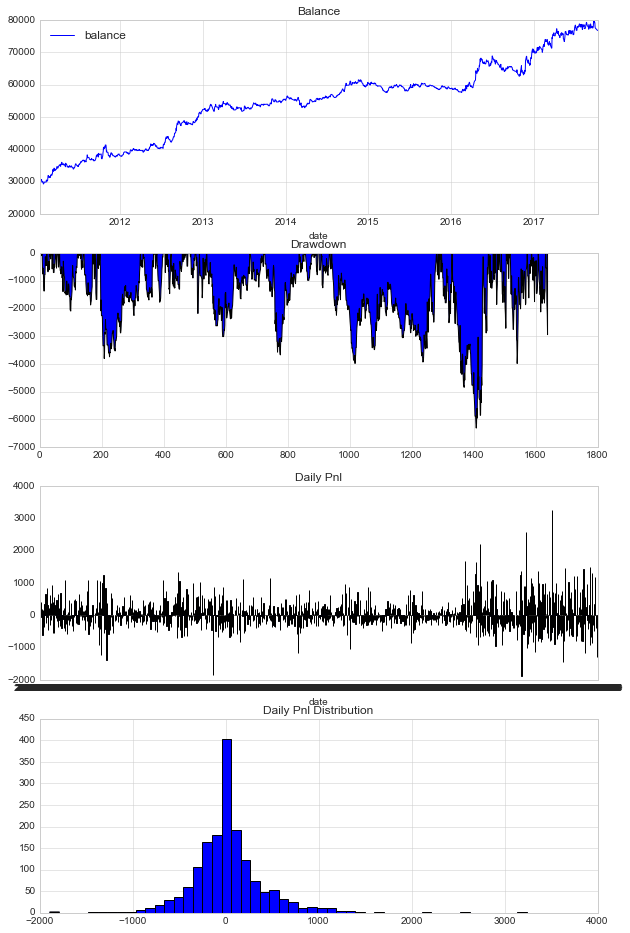

In [7]:
# 显示逐日回测结果
engine.showDailyResult()

In [ ]:
# 显示逐笔回测结果
engine.showBacktestingResult()

In [ ]:
# 显示前10条成交记录
for i in range(10):
    d = engine.tradeDict[str(i+1)].__dict__
    print 'TradeID: %s, Time: %s, Direction: %s, Price: %s, Volume: %s' %(d['tradeID'], d['dt'], d['direction'], d['price'], d['volume'])